In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid", context="talk")

In [2]:
CURRENT_DIR = Path.cwd()  # Current directory of the running file
PARENT_DIR = CURRENT_DIR.parent  # Parent directory of the current directory
print(f"Current Directory: {CURRENT_DIR}")
print(f"Parent Directory: {PARENT_DIR}")

Current Directory: c:\Users\admin\Coding\research\weld-ml\run1\P06_ML_Plot
Parent Directory: c:\Users\admin\Coding\research\weld-ml\run1


In [3]:
# Reading data from ML runs
datas_ML = [
    {
        "name": "no_af",
        "path": PARENT_DIR
        / "P01_no_af"
        / "T01_optuna"
        / "S03_calculate_performances.xlsx",
    },
    {
        "name": "MF_1",
        "path": PARENT_DIR
        / "P02_MF_1"
        / "T02_optuna"
        / "S03_calculate_performances.xlsx",
    },
    {
        "name": "MF_2",
        "path": PARENT_DIR
        / "P03_MF_2"
        / "T02_optuna"
        / "S03_calculate_performances.xlsx",
    },
    {
        "name": "VF_2_VIF",
        "path": PARENT_DIR
        / "P04_MF2"
        / "T02_optuna"
        / "S03_calculate_performances.xlsx",
    },
]

df_arr = []
for data in datas_ML:
    _df = pd.read_excel(data["path"])
    _df["run_name"] = data["name"]  # Add a column for the name of the dataset
    df_arr.append(_df)
    print(f"Data for {data['name']}:")
    # display(df.head())

df_ml = pd.concat(df_arr, ignore_index=True)
display(df_ml.head())


Data for no_af:
Data for MF_1:
Data for MF_2:
Data for VF_2_VIF:


,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,run_name
0,1,0.3,DTR,Y-1,0.866326,1.271951,1.636570,1.910079,0.133674,0.004997,no_af
1,1,0.3,DTR,Y-2,0.956704,0.864417,1.138763,1.526384,0.043296,-0.054135,no_af
2,1,0.3,DTR,Y-3,0.638276,0.591048,1.411317,1.476863,0.361724,0.307089,no_af
3,1,0.3,DTR,Y-All,0.820435,0.909139,1.395550,1.637775,0.179565,0.085983,no_af
4,2,0.3,DTR,Y-1,0.954431,0.897289,1.359437,1.124797,0.045569,-0.028396,no_af


In [4]:
df_ml.columns

Index(['random_state', 'test_size', 'model', 'Y', 'MSE Train (No Val)',
       'MSE Test', 'MAPE Train (No Val)', 'MAPE Test', 'R2 Train (No Val)',
       'R2 Test', 'run_name'],
      dtype='object')

In [5]:
# Reading data from tabPFN runs
datas_trans = [
    {
        "name": "no_af",
        "path": PARENT_DIR
        / "P01_no_af"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
    {
        "name": "MF_1",
        "path": PARENT_DIR
        / "P02_MF_1"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
    {
        "name": "MF_2",
        "path": PARENT_DIR
        / "P03_MF_2"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
    {
        "name": "VF_2_VIF",
        "path": PARENT_DIR
        / "P04_MF2"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
]

df_arr = []
for data in datas_trans:
    _df = pd.read_excel(data["path"])
    _df["run_name"] = data["name"]  # Add a column for the name of the dataset
    df_arr.append(_df)
    print(f"Data for {data['name']}:")
    # display(df.head())

df_trans = pd.concat(df_arr, ignore_index=True)
df_trans = df_trans.rename(
    columns={"MSE": "MSE Test", "MAPE": "MAPE Test", "R2": "R2 Test"}
)
display(df_trans.head())

Data for no_af:


Data for MF_1:
Data for MF_2:
Data for VF_2_VIF:


,random_state,test_size,model,Y,MSE Test,MAPE Test,R2 Test,run_name
0,1,0.3,TabPFN,Y-1,1.277798,1.604244,0.000423,no_af
1,1,0.3,TabPFN,Y-2,0.831836,1.053364,-0.014403,no_af
2,1,0.3,TabPFN,Y-3,0.550377,1.203430,0.354769,no_af
3,1,0.3,TabPFN,Y-All,0.886670,1.287012,0.113596,no_af
4,2,0.3,TabPFN,Y-1,0.893694,1.123660,-0.024277,no_af


In [6]:
df = pd.concat([df_ml, df_trans], ignore_index=True)
display(df)

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,run_name
0,1,0.3,DTR,Y-1,0.866326,1.271951,1.636570,1.910079,0.133674,0.004997,no_af
1,1,0.3,DTR,Y-2,0.956704,0.864417,1.138763,1.526384,0.043296,-0.054135,no_af
2,1,0.3,DTR,Y-3,0.638276,0.591048,1.411317,1.476863,0.361724,0.307089,no_af
3,1,0.3,DTR,Y-All,0.820435,0.909139,1.395550,1.637775,0.179565,0.085983,no_af
4,2,0.3,DTR,Y-1,0.954431,0.897289,1.359437,1.124797,0.045569,-0.028396,no_af
...,...,...,...,...,...,...,...,...,...,...,...
635,4,0.3,TabPFN,Y-All,NaN,0.736198,NaN,1.576269,NaN,0.255948,VF_2_VIF
636,5,0.3,TabPFN,Y-1,NaN,0.943171,NaN,1.409703,NaN,0.191243,VF_2_VIF
637,5,0.3,TabPFN,Y-2,NaN,0.792151,NaN,1.194374,NaN,-0.034656,VF_2_VIF
638,5,0.3,TabPFN,Y-3,NaN,0.493716,NaN,1.232303,NaN,0.480550,VF_2_VIF


In [7]:
df["run_name"].unique()

array(['no_af', 'MF_1', 'MF_2', 'VF_2_VIF'], dtype=object)

In [8]:
df["model"].unique()

array(['DTR', 'EN', 'GBR', 'KNR', 'RFR', 'SVR', 'XGBR', 'TabPFN'],
      dtype=object)

In [9]:
filt1 = df["Y"] != "Y-All"
# filt2 = df["run_name"] == "VF_2_VIF"
filt2 = df["run_name"].any()
filt3 = df["Y"] == "Y-3"
df_filt = df[filt1 & filt2 & filt3]
df_filt

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,run_name
2,1,0.3,DTR,Y-3,0.638276,0.591048,1.411317,1.476863,0.361724,0.307089,no_af
6,2,0.3,DTR,Y-3,0.708503,0.746226,1.989533,1.533004,0.291497,0.323988,no_af
10,3,0.3,DTR,Y-3,0.669771,0.494973,1.484842,1.470145,0.330229,0.325966,no_af
14,4,0.3,DTR,Y-3,0.710238,0.596722,1.281982,1.177087,0.289762,0.293296,no_af
18,5,0.3,DTR,Y-3,0.643974,0.598135,1.524905,1.107796,0.356026,0.370689,no_af
...,...,...,...,...,...,...,...,...,...,...,...
622,1,0.3,TabPFN,Y-3,NaN,0.429463,NaN,1.177243,NaN,0.496522,VF_2_VIF
626,2,0.3,TabPFN,Y-3,NaN,0.599715,NaN,1.211344,NaN,0.456713,VF_2_VIF
630,3,0.3,TabPFN,Y-3,NaN,0.377594,NaN,1.025797,NaN,0.485808,VF_2_VIF
634,4,0.3,TabPFN,Y-3,NaN,0.538068,NaN,1.308784,NaN,0.362760,VF_2_VIF


Order of models based on mean R2 Test: Index(['TabPFN', 'GBR', 'XGBR', 'RFR', 'DTR', 'EN', 'SVR', 'KNR'], dtype='object', name='model')


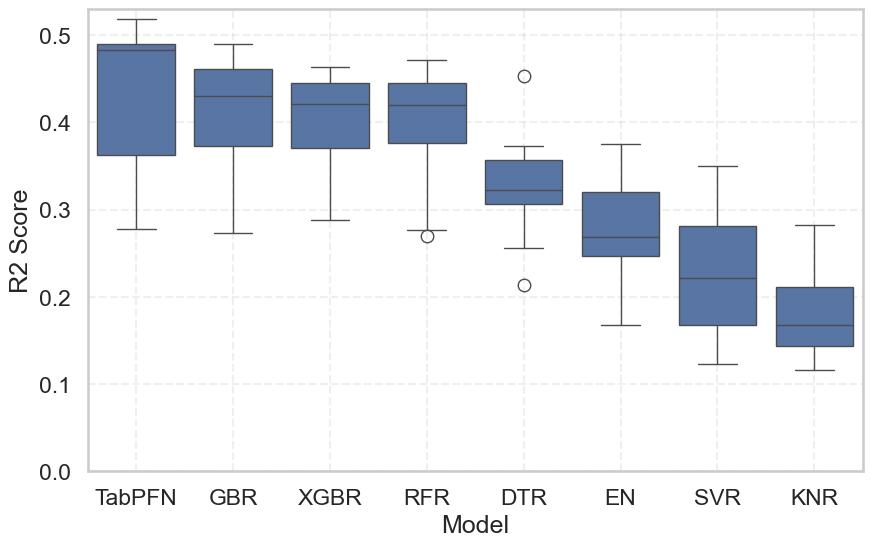

In [10]:
filt1 = df["Y"] != "Y-All"
# filt2 = df["run_name"] == "VF_2_VIF"
filt2 = df["run_name"].any()
filt3 = df["Y"] == "Y-3"
df_filt = df[filt1 & filt2 & filt3]


mean_order = (
    df_filt.groupby("model")["R2 Test"].mean().sort_values(ascending=False).index
)
print("Order of models based on mean R2 Test:", mean_order)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df_filt, x="model", y="R2 Test", ax=ax, order=mean_order)
plt.grid(True, which="major", linestyle="--", alpha=0.3)
ax.set_ylim(0.0, 0.53)
ax.set_xlabel("Model")
ax.set_ylabel("R2 Score")
plt.savefig("compare_different_models.png", dpi=300, bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_12832\496676826.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["Y"] = df_filt["Y"].map(section_map)


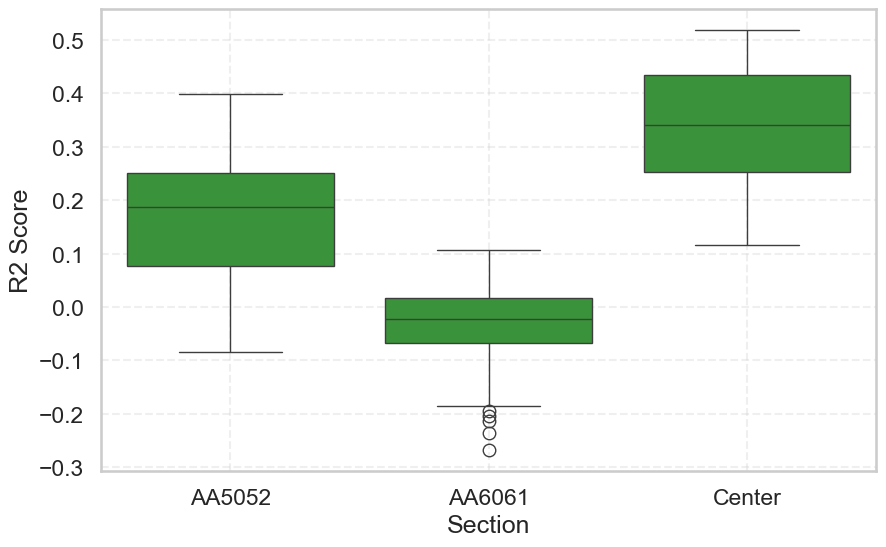

In [11]:
filt1 = df["Y"] != "Y-All"
# filt2 = df["run_name"] == "VF_2_VIF"
filt2 = df["run_name"].any()
filt3 = df[
    "Y"
].any()  # This will be True if there is any non-empty value in the "Y" column
# filt3 = df["model"].isin(["TabPFN", "XGBoost", "RFR"])
df_filt = df[filt1 & filt2 & filt3]


section_map = {
    "Y-1": "AA5052",
    "Y-2": "AA6061",
    "Y-3": "Center",
}

df_filt["Y"] = df_filt["Y"].map(section_map)


# mean_order = df_filt.groupby("model")["R2 Test"].mean().sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df_filt, x="Y", y="R2 Test", ax=ax, color="tab:green")
plt.grid(True, which="major", linestyle="--", alpha=0.3)
# ax.set_ylim(0.0, 0.53)
ax.set_xlabel("Section")
ax.set_ylabel("R2 Score")
plt.savefig("compare_different_sections.png", dpi=300, bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_12832\2661357260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["run_name"] = df_filt["run_name"].map(run_name_map)


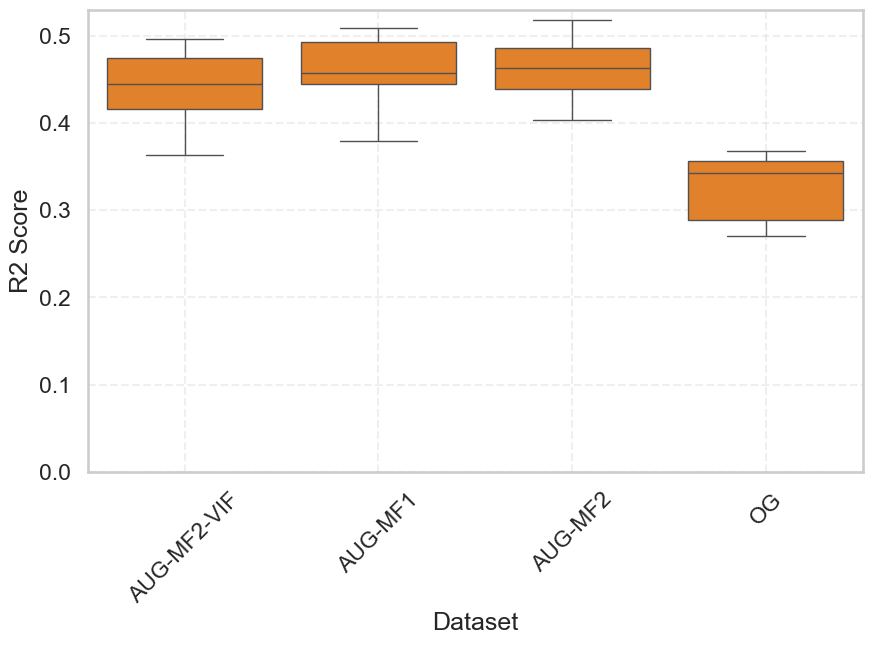

In [12]:
filt1 = df["Y"] != "Y-All"
filt2 = df["Y"] == "Y-3"
filt3 = df["model"].isin(["TabPFN", "XGBoost", "RFR"])
df_filt = df[filt1 & filt2 & filt3]

# Change Label
run_name_map = {
    "no_af": "OG",
    "MF_1": "AUG-MF1",
    "MF_2": "AUG-MF2",
    "VF_2_VIF": "AUG-MF2-VIF",
}
df_filt["run_name"] = df_filt["run_name"].map(run_name_map)


# run_name_order = (
#     df_filt.groupby("run_name")["R2 Test"].mean().sort_values(ascending=False).index
# )
run_name_order = [
    "AUG-MF2-VIF",
    "AUG-MF1",
    "AUG-MF2",
    "OG",
]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df_filt, x="run_name", y="R2 Test", ax=ax, order=run_name_order, color="tab:orange")
plt.grid(True, which="major", linestyle="--", alpha=0.3)
# Axis rotation
ax.tick_params(axis="x", rotation=45)
ax.set_ylim(0.0, 0.53)
ax.set_xlabel("Dataset")
ax.set_ylabel("R2 Score")
plt.savefig("compare_different_features.png", dpi=300, bbox_inches="tight")